In [100]:
from sklearn import linear_model,datasets
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def print_model_parameters(model):
    """
    Print some information about the model.
    
    :param model: Linear Regression model
    """
    coefficients = model.coef_
    intercept = model.intercept_
    print("Coefficients:")
    for i in range(len(coefficients)):
        print(f"Feature {i+1}: Coefficient = {coefficients[i]}, Intercept = {intercept}")
    # print("Intercept:", intercept)

R2 score on train data:0.9999977734179307
R2 score on test data:0.9998730146696593


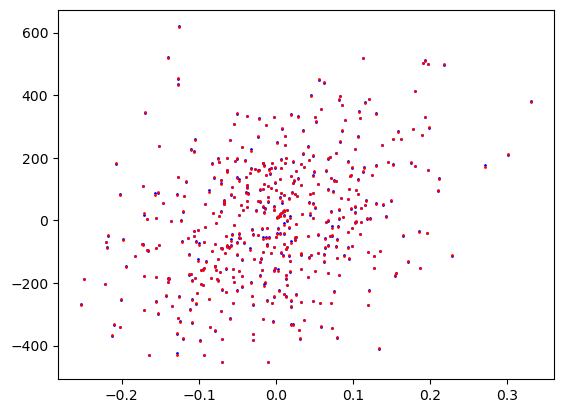

In [123]:
ns = 600
n_features = 100
n_targets = 1
r_train = 0.2


n_train = int(ns * r_train)
n_test = ns - n_train

# ,n_features=1,n_targets=1
x, y = datasets.make_regression(
    n_samples=ns,
    n_features=n_features,
    n_targets=n_targets,
    noise=1,
    # random_state=42,
)
# x=x.flatten()
# x.shape,y.shape
# np.random.seed(42)
indices = np.random.permutation(ns)

train_indices = indices[:n_train]
test_indices = indices[n_train:]

x_train = x[train_indices]
x_test = x[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

model = linear_model.LinearRegression()
model.fit(x_train.reshape(-1, n_features), y_train)
# print_model_parameters(model)



# predict using the test set
y_pred = model.predict(x_test.reshape(-1, n_features))
print(f"R2 score on train data:{model.score(x_train,y_train)}")
print(f"R2 score on test data:{model.score(x_test,y_test)}")
# plt.scatter(list(x_test[:,0]),y_test,c="blue",s=1)

x_test_mean = (np.mean(x_test, axis=1)).reshape(-1, 1)# for showing 10 features in on plot

plt.scatter(x_test_mean, y_test, c="blue", s=1)
plt.scatter(x_test_mean, y_pred, c="red", s=1)

plt.show()